In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#importing dataframes
path = r'C:\Instacart Basket Achievement 4 NEW'

In [3]:
path

'C:\\Instacart Basket Achievement 4 NEW'

In [4]:
ords_prods_custs_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [5]:
ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,First_Name,Last_Name,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
ords_prods_custs_merge.shape

(32404859, 33)

#2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.(Particularly sensitive are names, email addresses, physical addresses, and phone numbers.)
I will removing First and Last Name from the dataframe.

In [7]:
ords_prods_custs_merge = ords_prods_custs_merge.drop(columns = ['First_Name', 'Last_Name']) # Excluding PII of first and last name. 

In [8]:
ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both


#3.The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.
Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions).
Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

Regions:Region 1 (Northeast);Region 2 (Midwest);Region 3 (South); Region 4 (West)

In [9]:
# Accessing the column
column_to_check = ords_prods_custs_merge['State']

In [10]:
# Checking the unique values in the column
unique_values = column_to_check.unique()

In [11]:
unique_values

array(['Alabama', 'Indiana', 'Louisiana', 'Montana', 'Oklahoma',
       'Tennessee', 'Iowa', 'Ohio', 'Virginia', 'Connecticut', 'Kentucky',
       'Oregon', 'South Dakota', 'Michigan', 'New Jersey', 'Arizona',
       'Maine', 'Hawaii', 'Minnesota', 'Illinois', 'Idaho', 'Kansas',
       'North Carolina', 'Vermont', 'Alaska', 'Delaware', 'Maryland',
       'Nebraska', 'Nevada', 'Arkansas', 'Georgia',
       'District of Columbia', 'Utah', 'Colorado', 'Florida',
       'South Carolina', 'Rhode Island', 'Washington', 'California',
       'Mississippi', 'Texas', 'New Mexico', 'Missouri', 'Wyoming',
       'New Hampshire', 'Massachusetts', 'Pennsylvania', 'Wisconsin',
       'West Virginia', 'North Dakota', 'New York'], dtype=object)

In [12]:
# Creating a for-loop for regions

result = []

for value in ords_prods_custs_merge['State']:
    if value in ('Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 
                 'Pennsylvania', 'New Jersey'):
        result.append('Northeast')
    elif value in ('Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota' , 'South Dakota', 'Nebraska', 
                   'Kansas', 'Minnesota', 'Iowa', 'Missouri'):
        result.append('Midwest')
    elif value in ('Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
                   'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 
                   'Oklahoma', 'Texas', 'Arkansas', 'Louisiana'):
        result.append('South')
    elif value in ('Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 
                   'Washington', 'Oregon', 'California', 'Hawaii'):
        result.append('West')
   

In [13]:
result

['South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'South',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 'Midwest',
 '

In [14]:
ords_prods_custs_merge['Region'] = result # Making a new "Region" column with the result list

In [15]:
ords_prods_custs_merge['Region'].value_counts(dropna = False) # Finding the value counts for the new column

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

 The total : 32404859 same as before.

In [16]:
column_names = ords_prods_custs_merge.columns

In [17]:
column_names

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_order_price', 'spending_flag', 'median_days_since_prior_order',
       'regularity_flag', 'Gender', 'State', 'Age', 'date_joined',
       'number_of_dependents', 'fam_status', 'income', '_merge', 'Region'],
      dtype='object')

In [18]:
# Creating new pivot table for 'Region' and 'spending_flag'

df = ords_prods_custs_merge.pivot_table(index='Region', columns='spending_flag', values='order_number', aggfunc='count', fill_value=0)

In [19]:
df

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


In [20]:
#running statistical test to see whether there’s a difference in spending habits between the different U.S. regions.
# Data
high_spender = np.array([155975, 108225, 209691, 160354])
low_spender = np.array([7441350, 5614511, 10582194, 8132559])

# T-test
t_stat, p_t = scipy.stats.ttest_ind(high_spender, low_spender)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_t}")


T-statistic: -7.572509872684526
P-value: 0.00027559695213604695


Assumption:
Null hypothesis (H0): There is no difference in the mean spending between the U.S. regions.
Alternative hypothesis (H1): There is a difference in the mean spending between the U.S. regions.


T-test:

T-statistic: -7.57
P-value: 0.00028
The low p-value (< 0.05) in the t-test also indicates that there is a significant difference in mean spending between the U.S. regions.

The evidence suggests that there is a statistically significant difference in spending habits among the different U.S. regions.

#4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [21]:
#  create a new column 'exclude_flag' based on order_count

ords_prods_custs_merge['exclusion_flag'] = np.where(ords_prods_custs_merge['max_order'] < 5, 'Yes', 'No')

In [22]:
ords_prods_custs_merge.head() #checking

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No


In [23]:
# Creating a new data frame for all the customers who have ordered fewer than 5 times.

ords_prods_custslessthan5_merge = ords_prods_custs_merge[ords_prods_custs_merge['exclusion_flag'] == 'Yes']

In [24]:
ords_prods_custslessthan5_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,...,Female,Kentucky,54,3/2/2017,2,married,99219,both,South,Yes


In [25]:
ords_prods_custslessthan5_merge.shape

(1440295, 33)

In [26]:
# Exporting ords_prods_custslessthan5_merge with the "under 5 orders" records

ords_prods_custslessthan5_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'under_five_orders.csv'))

In [27]:
ords_prods_custs_merge = ords_prods_custs_merge[ords_prods_custs_merge['exclusion_flag'] != 'Yes'] #restoring the original dataframe

In [28]:
ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,No


In [29]:
ords_prods_custs_merge.shape  #numbers match

(30964564, 33)

#5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [30]:
ords_prods_custs_merge['Gender'].value_counts(dropna = False)   #by gender

Gender
Male      15586740
Female    15377824
Name: count, dtype: int64

In [31]:
ords_prods_custs_merge['number_of_dependents'].value_counts(dropna = False) #by dependents

number_of_dependents
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [32]:
ords_prods_custs_merge['Age'].value_counts(dropna = False) #by Age

Age
79    508337
49    507879
48    506730
31    506218
64    504832
       ...  
60    461897
36    460649
66    454604
41    451269
25    449324
Name: count, Length: 64, dtype: int64

In [33]:
ords_prods_custs_merge['income'].value_counts(dropna = False) #by income

income
72344     4395
112610    4242
57501     4136
115620    3831
36163     3657
          ... 
47901        5
90002        5
33040        5
35538        5
147660       2
Name: count, Length: 96069, dtype: int64

In [34]:
ords_prods_custs_merge['department_id'].value_counts(dropna = False) #by department

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [35]:
# Define age groups
age_bins = [0, 18, 25, 35, 45, 55, 100]
age_labels = ['0-18', '19-25', '26-35', '36-45', '46-55', '55+']
ords_prods_custs_merge['age_group'] = pd.cut(ords_prods_custs_merge['Age'], bins=age_bins, labels=age_labels, right=False)

In [36]:
# Define income groups
income_bins = [0, 30000, 50000, 70000, 100000, 150000, float('inf')]
income_labels = ['0-30k', '30k-50k', '50k-70k', '70k-100k', '100k-150k', '150k+']
ords_prods_custs_merge['income_group'] = pd.cut(ords_prods_custs_merge['income'], bins=income_bins, labels=income_labels, right=False)

In [37]:
# Define a list of certain goods in the "department_id" column that may represent specific customer interests
relevant_goods = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21] 
ords_prods_custs_merge['interested_in_relevant_goods'] = ords_prods_custs_merge['department_id'].isin(relevant_goods)

In [39]:
# Create a profiling variable based on the combination of factors
ords_prods_custs_merge['customer_profile'] = ''

# profiling based on age, income, certain goods, and number of dependents
conditions = [
    (ords_prods_custs_merge['age_group'].isin(['19-25', '26-35']) & (ords_prods_custs_merge['income_group'] == '50k-70k') & ords_prods_custs_merge['interested_in_relevant_goods'] & (ords_prods_custs_merge['number_of_dependents'] == 0)),
    (ords_prods_custs_merge['age_group'].isin(['19-25', '26-35']) & (ords_prods_custs_merge['income_group'] == '50k-70k') & ords_prods_custs_merge['interested_in_relevant_goods'] & (ords_prods_custs_merge['number_of_dependents'] > 0)),
    (ords_prods_custs_merge['age_group'].isin(['36-45', '46-55']) & (ords_prods_custs_merge['income_group'].isin(['70k-100k', '100k-150k'])) & ords_prods_custs_merge['interested_in_relevant_goods'] & (ords_prods_custs_merge['number_of_dependents'] > 0)),
    (ords_prods_custs_merge['age_group'].isin(['36-45', '46-55']) & (ords_prods_custs_merge['income_group'].isin(['70k-100k', '100k-150k'])) & ords_prods_custs_merge['interested_in_relevant_goods'] & (ords_prods_custs_merge['number_of_dependents'] == 0)),
    (ords_prods_custs_merge['age_group'].isin(['55+']) & (ords_prods_custs_merge['income_group'] == '150k+') & ords_prods_custs_merge['interested_in_relevant_goods'] & (ords_prods_custs_merge['number_of_dependents'] == 0)),
]

profile_labels = ['Single Adult', 'Young Parent','Established Parent','Mature Adult', 'Affluent Single Senior']  
ords_prods_custs_merge['customer_profile'] = np.select(conditions, profile_labels, default='Other')



In [40]:
ords_prods_custs_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_group,income_group,interested_in_relevant_goods,customer_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,3,married,40423,both,South,No,26-35,30k-50k,True,Other


In [41]:
# Group by customer profile and calculate the mean order price for each group
profile_analysis = ords_prods_custs_merge.groupby('customer_profile')['mean_order_price'].mean()

In [42]:
profile_analysis

customer_profile
Affluent Single Senior    23.077183
Established Parent         9.257696
Mature Adult              10.392369
Other                     12.822606
Single Adult               7.954145
Young Parent               7.960846
Name: mean_order_price, dtype: float64

In [43]:
pivot_table = pd.pivot_table(ords_prods_custs_merge,
                             values=['order_id', 'mean_order_price', 'number_of_dependents'],
                             index='customer_profile',
                             aggfunc={'order_id': 'count', 'mean_order_price': 'mean', 'number_of_dependents': 'mean'})

In [44]:
pivot_table

,mean_order_price,number_of_dependents,order_id
customer_profile,,,
Affluent Single Senior,23.077183,0.000000,632138
Established Parent,9.257696,1.999290,4471785
Mature Adult,10.392369,0.000000,1447971
Other,12.822606,1.543060,21420542
Single Adult,7.954145,0.000000,747257
Young Parent,7.960846,2.008845,2244871


In [45]:
#The affluent Single senior is spending the most

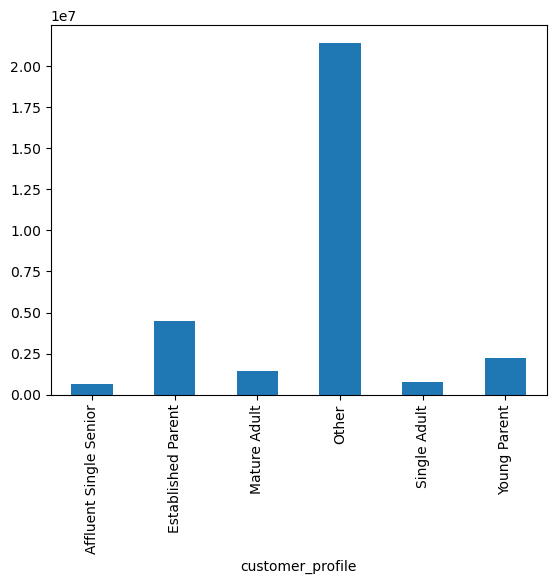

In [46]:
bar = ords_prods_custs_merge['customer_profile'].value_counts().sort_index().plot.bar()

In [47]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'customer_profile.png'))

#7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [48]:
pivot_table_aggregated = pd.pivot_table(ords_prods_custs_merge,
                                        values=['number_of_dependents', 'mean_order_price'],
                                        index='customer_profile',
                                        aggfunc={'number_of_dependents': ['max', 'mean', 'min'],
                                                 'mean_order_price': ['max', 'mean', 'min']})

In [49]:
pivot_table_aggregated 

mean_order_price                       \
                                    max       mean       min   
customer_profile                                               
Affluent Single Senior      3074.904908  23.077183  7.000575   
Established Parent          2550.966102   9.257696  7.000000   
Mature Adult                5135.893590  10.392369  7.000380   
Other                      15006.940000  12.822606  1.000000   
Single Adult                  12.518182   7.954145  7.000000   
Young Parent                  22.256974   7.960846  7.000000   

                       number_of_dependents                
                                        max      mean min  
customer_profile                                           
Affluent Single Senior                    0  0.000000   0  
Established Parent                        3  1.999290   1  
Mature Adult                              0  0.000000   0  
Other                                     3  1.543060   0  
Single Adult                              0  0.000000   0  
Young Parent                              3  2.008845   1

#8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [50]:
# Group by 'customer_profile', 'Region', and 'department_id', and calculate the count of customers
profile_region_department_count = ords_prods_custs_merge.groupby(['customer_profile', 'Region', 'department_id'])['user_id'].count().reset_index()


In [51]:
profile_region_department_count

,customer_profile,Region,department_id,user_id
0,Affluent Single Senior,Midwest,1,10239
1,Affluent Single Senior,Midwest,2,161
2,Affluent Single Senior,Midwest,3,5271
3,Affluent Single Senior,Midwest,4,41371
4,Affluent Single Senior,Midwest,5,740
...,...,...,...,...
499,Young Parent,West,17,12289
500,Young Parent,West,18,7632
501,Young Parent,West,19,47246
502,Young Parent,West,20,19262


In [52]:
# Group by 'customer_profile', 'Region', and 'department_id', and calculate the count of customers
profile_region_department_count = ords_prods_custs_merge.groupby(['customer_profile', 'Region', 'department_id'])['user_id'].count().reset_index()

# Create a pivot table for better readability
pivot_table = pd.pivot_table(profile_region_department_count,
                             values='user_id',
                             index=['customer_profile', 'Region'],
                             columns='department_id',
                             fill_value=0)


In [53]:
pivot_table

department_id                           1       2         3          4   \
customer_profile       Region                                             
Affluent Single Senior Midwest     10239.0   161.0    5271.0    41371.0   
                       Northeast    7641.0   142.0    4190.0    33117.0   
                       South       15658.0   207.0    7789.0    62708.0   
                       West        11780.0   152.0    5946.0    50381.0   
Established Parent     Midwest     74663.0  1158.0   38599.0   316130.0   
                       Northeast   55142.0   857.0   28701.0   236876.0   
                       South      102157.0  1648.0   52992.0   448229.0   
                       West        77661.0  1156.0   42309.0   340043.0   
Mature Adult           Midwest     24767.0   439.0   13612.0   109435.0   
                       Northeast   16154.0   261.0    8948.0    68098.0   
                       South       34023.0   568.0   18432.0   145181.0   
                       West        25916.0   401.0   13645.0   111742.0   
Other                  Midwest    341895.0  5499.0  179796.0  1462120.0   
                       Northeast  256524.0  4443.0  138382.0  1095487.0   
                       South      489752.0  7982.0  255063.0  2066249.0   
                       West       372999.0  6084.0  196859.0  1583756.0   
Single Adult           Midwest     10743.0   173.0    5884.0    48847.0   
                       Northeast    9348.0   156.0    5271.0    40401.0   
                       South       17305.0   298.0    9731.0    78465.0   
                       West        12270.0   178.0    7261.0    60546.0   
Young Parent           Midwest     35918.0   553.0   18591.0   156212.0   
                       Northeast   25627.0   409.0   13808.0   119025.0   
                       South       51011.0   876.0   27613.0   226644.0   
                       West        42538.0   610.0   22135.0   178210.0   

department_id                          5        6         7        8   \
customer_profile       Region                                           
Affluent Single Senior Midwest      740.0   1119.0   10944.0    395.0   
                       Northeast    831.0    987.0    9252.0    465.0   
                       South       1259.0   1797.0   17054.0    717.0   
                       West         523.0   1490.0   13408.0    446.0   
Established Parent     Midwest     4371.0   9214.0   82636.0   2859.0   
                       Northeast   3665.0   6658.0   61172.0   2024.0   
                       South       6337.0  12919.0  116073.0   4066.0   
                       West        4726.0   9635.0   88236.0   3740.0   
Mature Adult           Midwest     2023.0   3293.0   28722.0    988.0   
                       Northeast   1392.0   1991.0   18599.0    859.0   
                       South       2091.0   4262.0   39537.0   1676.0   
                       West        1848.0   3246.0   28963.0    941.0   
Other                  Midwest    23505.0  41213.0  423185.0  14339.0   
                       Northeast  17160.0  30621.0  332574.0  13056.0   
                       South      35211.0  57104.0  611560.0  20813.0   
                       West       26245.0  44913.0  458966.0  16491.0   
Single Adult           Midwest      972.0   1302.0   11971.0    446.0   
                       Northeast    753.0   1262.0   11076.0    297.0   
                       South        901.0   2243.0   19764.0    556.0   
                       West         756.0   1730.0   15025.0    825.0   
Young Parent           Midwest     2432.0   4525.0   41521.0   2331.0   
                       Northeast   1216.0   3159.0   30256.0   1033.0   
                       South       3014.0   6324.0   55431.0   2081.0   
                       West        2656.0   4984.0   45976.0   1616.0   

department_id                           9       10  ...        12        13  \
customer_profile       Region                       ...                

In [54]:
# Group by 'customer_profile', 'Region', and 'department_id', and calculate the count of customers
profile_region_department_count = ords_prods_custs_merge.groupby(['customer_profile', 'Region', 'department_id'])['user_id'].count().reset_index()

In [55]:
# Create a pivot table for better readability
pivot_table_1 = pd.pivot_table(profile_region_department_count,
                             values='user_id',
                             index=['customer_profile', 'Region'],
                             columns='department_id',
                             fill_value=0)

In [56]:
pivot_table_1

department_id                           1       2         3          4   \
customer_profile       Region                                             
Affluent Single Senior Midwest     10239.0   161.0    5271.0    41371.0   
                       Northeast    7641.0   142.0    4190.0    33117.0   
                       South       15658.0   207.0    7789.0    62708.0   
                       West        11780.0   152.0    5946.0    50381.0   
Established Parent     Midwest     74663.0  1158.0   38599.0   316130.0   
                       Northeast   55142.0   857.0   28701.0   236876.0   
                       South      102157.0  1648.0   52992.0   448229.0   
                       West        77661.0  1156.0   42309.0   340043.0   
Mature Adult           Midwest     24767.0   439.0   13612.0   109435.0   
                       Northeast   16154.0   261.0    8948.0    68098.0   
                       South       34023.0   568.0   18432.0   145181.0   
                       West        25916.0   401.0   13645.0   111742.0   
Other                  Midwest    341895.0  5499.0  179796.0  1462120.0   
                       Northeast  256524.0  4443.0  138382.0  1095487.0   
                       South      489752.0  7982.0  255063.0  2066249.0   
                       West       372999.0  6084.0  196859.0  1583756.0   
Single Adult           Midwest     10743.0   173.0    5884.0    48847.0   
                       Northeast    9348.0   156.0    5271.0    40401.0   
                       South       17305.0   298.0    9731.0    78465.0   
                       West        12270.0   178.0    7261.0    60546.0   
Young Parent           Midwest     35918.0   553.0   18591.0   156212.0   
                       Northeast   25627.0   409.0   13808.0   119025.0   
                       South       51011.0   876.0   27613.0   226644.0   
                       West        42538.0   610.0   22135.0   178210.0   

department_id                          5        6         7        8   \
customer_profile       Region                                           
Affluent Single Senior Midwest      740.0   1119.0   10944.0    395.0   
                       Northeast    831.0    987.0    9252.0    465.0   
                       South       1259.0   1797.0   17054.0    717.0   
                       West         523.0   1490.0   13408.0    446.0   
Established Parent     Midwest     4371.0   9214.0   82636.0   2859.0   
                       Northeast   3665.0   6658.0   61172.0   2024.0   
                       South       6337.0  12919.0  116073.0   4066.0   
                       West        4726.0   9635.0   88236.0   3740.0   
Mature Adult           Midwest     2023.0   3293.0   28722.0    988.0   
                       Northeast   1392.0   1991.0   18599.0    859.0   
                       South       2091.0   4262.0   39537.0   1676.0   
                       West        1848.0   3246.0   28963.0    941.0   
Other                  Midwest    23505.0  41213.0  423185.0  14339.0   
                       Northeast  17160.0  30621.0  332574.0  13056.0   
                       South      35211.0  57104.0  611560.0  20813.0   
                       West       26245.0  44913.0  458966.0  16491.0   
Single Adult           Midwest      972.0   1302.0   11971.0    446.0   
                       Northeast    753.0   1262.0   11076.0    297.0   
                       South        901.0   2243.0   19764.0    556.0   
                       West         756.0   1730.0   15025.0    825.0   
Young Parent           Midwest     2432.0   4525.0   41521.0   2331.0   
                       Northeast   1216.0   3159.0   30256.0   1033.0   
                       South       3014.0   6324.0   55431.0   2081.0   
                       West        2656.0   4984.0   45976.0   1616.0   

department_id                           9       10  ...        12        13  \
customer_profile       Region                       ...                

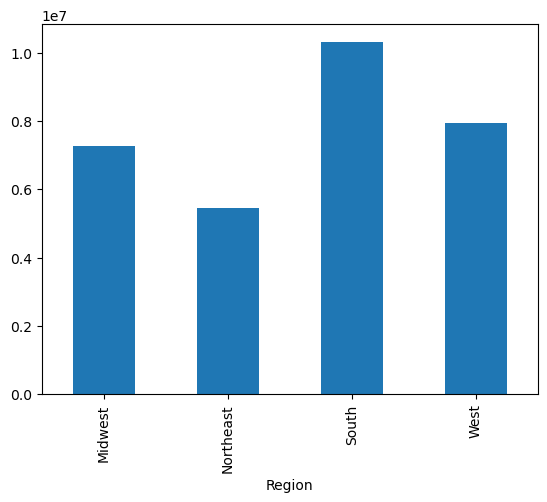

In [57]:
bar_1 = ords_prods_custs_merge['Region'].value_counts().sort_index().plot.bar()

In [58]:
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Region.png'))

[Text(0, 0, 'Midwest'),
 Text(1, 0, 'Northeast'),
 Text(2, 0, 'South'),
 Text(3, 0, 'West')]

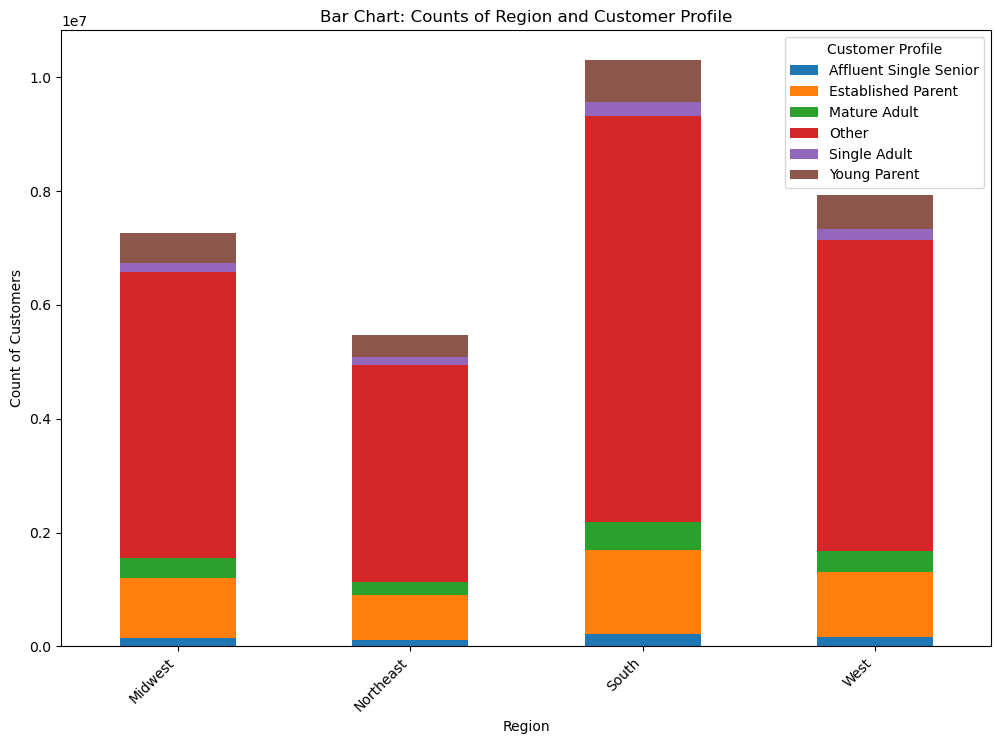

In [59]:
bar_2 = ords_prods_custs_merge.groupby(['Region', 'customer_profile']).size().unstack().plot(kind='bar', stacked=True, figsize=(12, 8))

bar_2.set_title('Bar Chart: Counts of Region and Customer Profile')
bar_2.set_xlabel('Region')
bar_2.set_ylabel('Count of Customers')
bar_2.legend(title='Customer Profile', loc='upper right')
bar_2.set_xticklabels(bar_2.get_xticklabels(), rotation=45, horizontalalignment='right')


In [60]:
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualization', 'Region_and_customer_profile.png'))

In [61]:
ords_prods_custs_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))